In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import *

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

    The external data is imported from NOAA(National Oceanic and Atmospheric Administration). By observing the only two stations in New York, I decided to choose data from the "NY CITY CENTRAL PARK" station due to the location in the middle of the city is more representative than the other station which located at the edge of the JFK International Airport.
    Queried the following data types from 2018-10-1 to 2018-12-31
WT01 - Fog, ice fog, or freezing fog (may include heavy fog)

WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)

WT03 - Thunder

WT04 - Ice pellets, sleet, snow pellets, or small hail" 

WT06 - Glaze or rime 

WT08 - Smoke or haze



TMAX - Maximum temperature

TMIN - Minimum temperature

In [2]:
# https://www.ncdc.noaa.gov/cdo-web/confirmation
weather = pd.read_csv("../raw_data/weather2018.csv")

In [5]:
weather19 = pd.read_csv("../raw_data/weather2019.csv")

In [6]:
weather = weather[["STATION", "NAME", "LATITUDE", "LONGITUDE", "DATE", "SNOW", "SNWD", "TAVG", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT06", "WT08"]]
weather

STATION                         NAME  LATITUDE  LONGITUDE        DATE  \
0   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-10-01   
1   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-10-02   
2   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-10-03   
3   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-10-04   
4   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-10-05   
..          ...                          ...       ...        ...         ...   
87  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-12-27   
88  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-12-28   
89  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-12-29   
90  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-12-30   
91  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2018-12-31   

    SNOW  SNWD  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  WT06  WT08  
0    0.0   0.0   NaN    76    63   NaN   NaN   NaN   NaN   NaN   NaN  
1    0.0   0.0   NaN    77    65   1.0   NaN   1.0   NaN   NaN   1.0  
2    0.0   0.0   NaN    74    63   NaN   NaN   NaN   NaN   NaN   NaN  
3    0.0   0.0   NaN    76    61   1.0   NaN   NaN   NaN   NaN   NaN  
4    0.0   0.0   NaN    71    60   NaN   NaN   NaN   NaN   NaN   NaN  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
87   0.0   0.0   NaN    44    37   NaN   NaN   NaN   NaN   NaN   NaN  
88   0.0   0.0   NaN    60    43   1.0   NaN   NaN   NaN   NaN   NaN  
89   0.0   0.0   NaN    57    39   NaN   NaN   NaN   NaN   NaN   NaN  
90   0.0   0.0   NaN    40    33   NaN   NaN   NaN   NaN   NaN   NaN  
91   0.0   0.0   NaN    48    36   1.0   NaN   NaN   NaN   NaN   NaN  

[92 rows x 16 columns]

In [7]:
weather19 = weather19[["STATION", "NAME", "LATITUDE", "LONGITUDE", "DATE", "TAVG", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT06", "WT08"]]
weather19

STATION                         NAME  LATITUDE  LONGITUDE        DATE  \
0   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-01   
1   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-02   
2   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-03   
3   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-04   
4   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-05   
..          ...                          ...       ...        ...         ...   
87  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-27   
88  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-28   
89  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-29   
90  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-30   
91  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-31   

    TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  WT06  WT08  
0    NaN    81    63   NaN   NaN   NaN   NaN   NaN   NaN  
1    NaN    93    63   1.0   NaN   NaN   NaN   NaN   NaN  
2    NaN    63    53   1.0   NaN   NaN   NaN   NaN   NaN  
3    NaN    66    50   1.0   NaN   NaN   NaN   NaN   NaN  
4    NaN    61    45   NaN   NaN   NaN   NaN   NaN   NaN  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...  
87   NaN    54    46   NaN   NaN   NaN   NaN   NaN   NaN  
88   NaN    51    43   1.0   NaN   NaN   NaN   NaN   1.0  
89   NaN    44    39   1.0   NaN   NaN   NaN   NaN   NaN  
90   NaN    41    37   1.0   NaN   NaN   NaN   NaN   NaN  
91   NaN    45    36   1.0   NaN   NaN   NaN   NaN   NaN  

[92 rows x 14 columns]

In [28]:
# check the data type of the variables
weather["TMAX"].dtypes

dtype('int64')

In [8]:
# construct binary variable
weather["TAVG"] = (weather["TMAX"] + weather["TMIN"])/2
weather["WEATHER"] = weather[["WT01", "WT02", "WT03", "WT04", "WT06", "WT08"]].sum(axis = 1)
# 1 refers to the with extreme weather, 0 refers not 
weather["WEATHER"] = np.where(weather["WEATHER"] > 0, "1", "0")
weather = weather.drop(["WT01", "WT02", "WT03", "WT04", "WT06", "WT08"], axis = "columns")
weather["DATE"] = weather["DATE"].str[5:10]
weather

STATION                         NAME  LATITUDE  LONGITUDE   DATE  \
0   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  10-01   
1   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  10-02   
2   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  10-03   
3   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  10-04   
4   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  10-05   
..          ...                          ...       ...        ...    ...   
87  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  12-27   
88  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  12-28   
89  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  12-29   
90  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  12-30   
91  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  12-31   

    SNOW  SNWD  TAVG  TMAX  TMIN WEATHER  
0    0.0   0.0  69.5    76    63       0  
1    0.0   0.0  71.0    77    65       1  
2    0.0   0.0  68.5    74    63       0  
3    0.0   0.0  68.5    76    61       1  
4    0.0   0.0  65.5    71    60       0  
..   ...   ...   ...   ...   ...     ...  
87   0.0   0.0  40.5    44    37       0  
88   0.0   0.0  51.5    60    43       1  
89   0.0   0.0  48.0    57    39       0  
90   0.0   0.0  36.5    40    33       0  
91   0.0   0.0  42.0    48    36       1  

[92 rows x 11 columns]

In [9]:
weather19

STATION                         NAME  LATITUDE  LONGITUDE        DATE  \
0   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-01   
1   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-02   
2   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-03   
3   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-04   
4   USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-10-05   
..          ...                          ...       ...        ...         ...   
87  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-27   
88  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-28   
89  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-29   
90  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-30   
91  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925  2019-12-31   

    TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  WT06  WT08  
0    NaN    81    63   NaN   NaN   NaN   NaN   NaN   NaN  
1    NaN    93    63   1.0   NaN   NaN   NaN   NaN   NaN  
2    NaN    63    53   1.0   NaN   NaN   NaN   NaN   NaN  
3    NaN    66    50   1.0   NaN   NaN   NaN   NaN   NaN  
4    NaN    61    45   NaN   NaN   NaN   NaN   NaN   NaN  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...  
87   NaN    54    46   NaN   NaN   NaN   NaN   NaN   NaN  
88   NaN    51    43   1.0   NaN   NaN   NaN   NaN   1.0  
89   NaN    44    39   1.0   NaN   NaN   NaN   NaN   NaN  
90   NaN    41    37   1.0   NaN   NaN   NaN   NaN   NaN  
91   NaN    45    36   1.0   NaN   NaN   NaN   NaN   NaN  

[92 rows x 14 columns]

In [10]:
weather19["TAVG"] = (weather19["TMAX"] + weather19["TMIN"])/2
weather19["WEATHER"] = weather19[["WT01", "WT02", "WT03", "WT04", "WT06", "WT08"]].sum(axis = 1)
# 1 refers to the with extreme weather, 0 refers not 
weather19["WEATHER"] = np.where(weather19["WEATHER"] > 0, "1", "0")
weather19 = weather19.drop(["WT01", "WT02", "WT03", "WT04", "WT06", "WT08"], axis = "columns")
weather19["DATE"] = weather19["DATE"].str[5:10]

In [6]:
# read cleaned tip file
cleaned_tip = pd.read_feather("../preprocessed_data/cleaned_tip.feather")

In [18]:
cleaned_tip19 = pd.read_feather("../preprocessed_data/cleaned_tip19.feather")

In [19]:
cleaned_tip = cleaned_tip.drop("index", axis = 1)
cleaned_tip

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                1  2018-10-01 00:05:35   2018-10-01 00:19:38   
1                1  2018-10-01 00:19:14   2018-10-01 00:31:54   
2                2  2018-10-01 00:42:46   2018-10-01 00:57:59   
3                1  2018-10-01 00:34:44   2018-10-01 00:52:23   
4                1  2018-10-01 00:27:40   2018-10-01 00:40:35   
...            ...                  ...                   ...   
14544770         2  2018-12-31 22:57:26   2018-12-31 23:27:04   
14544771         2  2018-12-31 23:23:45   2018-12-31 23:41:44   
14544772         2  2018-12-31 23:45:18   2018-12-31 23:51:59   
14544773         2  2018-12-31 23:16:46   2018-12-31 23:28:09   
14544774         2  2018-12-31 23:55:39   2018-12-31 23:59:15   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     1.0           6.10         1.0                  N   
1                     1.0           2.60         1.0                  N   
2                     1.0           4.31         1.0                  N   
3                     3.0           4.80         1.0                  N   
4                     1.0           3.00         1.0                  N   
...                   ...            ...         ...                ...   
14544770              1.0           7.09         1.0                  N   
14544771              1.0           5.83         1.0                  N   
14544772              1.0           1.98         1.0                  N   
14544773              2.0           2.68         1.0                  N   
14544774              1.0           0.92         1.0                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                 50.0         244.0           1.0         19.0    0.5   
1                233.0         143.0           1.0         11.0    0.5   
2                249.0         143.0           1.0         15.5    0.5   
3                237.0         116.0           1.0         17.0    0.5   
4                161.0          79.0           1.0         12.0    0.5   
...                ...           ...           ...          ...    ...   
14544770          43.0         231.0           1.0         26.0    0.5   
14544771         114.0         263.0           1.0         19.5    0.5   
14544772         132.0          10.0           1.0          8.0    0.5   
14544773         263.0          24.0           1.0         11.0    0.5   
14544774         263.0          75.0           1.0          5.0    0.5   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0             0.5        5.05           0.0                    0.3   
1             0.5        2.45           0.0                    0.3   
2             0.5        3.36           0.0                    0.3   
3             0.5        0.50           0.0                    0.3   
4             0.5        1.50           0.0                    0.3   
...           ...         ...           ...                    ...   
14544770      0.5        5.46           0.0                    0.3   
14544771      0.5        4.16           0.0                    0.3   
14544772      0.5        2.32           0.0                    0.3   
14544773      0.5        4.92           0.0                    0.3   
14544774      0.5        1.26           0.0                    0.3   

          total_amount    time   date  
0                25.35   00:00  10-01  
1                14.75   00:00  10-01  
2                20.16   00:00  10-01  
3                18.80   00:00  10-01  
4                14.80   00:00  10-01  
...                ...     ...    ...  
14544770         32.76   22:00  12-31  
14544771         24.96   23:00  12-31  
14544772         11.62   23:00  12-31  
14544773         17.22   23:00  12-31  
14544774          7.56   23:00  12-31  

[14544775 rows x 19 columns]

In [20]:
cleaned_tip19 = cleaned_tip19.drop("index", axis = 1)
cleaned_tip19

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              1.0  2019-10-01 00:40:19   2019-10-01 00:55:17   
1              1.0  2019-10-01 00:06:52   2019-10-01 00:21:23   
2              1.0  2019-10-01 00:03:00   2019-10-01 00:13:37   
3              1.0  2019-10-01 00:20:08   2019-10-01 00:27:10   
4              2.0  2019-10-01 00:06:02   2019-10-01 00:11:15   
...            ...                  ...                   ...   
12308560       1.0  2019-12-31 23:08:32   2019-12-31 23:24:59   
12308561       1.0  2019-12-31 23:36:22   2019-12-31 23:55:03   
12308562       2.0  2019-12-31 23:24:33   2019-12-31 23:34:50   
12308563       2.0  2019-12-31 23:46:57   2019-12-31 23:50:54   
12308564       2.0  2019-12-31 23:22:03   2019-12-31 23:29:06   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     2.0           4.30         1.0                  N   
1                     1.0           5.00         1.0                  N   
2                     3.0           2.20         1.0                  N   
3                     1.0           1.90         1.0                  N   
4                     1.0           1.44         1.0                  N   
...                   ...            ...         ...                ...   
12308560              2.0           2.10         1.0                  N   
12308561              1.0           2.10         1.0                  N   
12308562              3.0           1.88         1.0                  N   
12308563              1.0           0.97         1.0                  N   
12308564              1.0           3.30         1.0                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                144.0         141.0           1.0         14.5    3.0   
1                137.0          80.0           1.0         17.0    3.0   
2                163.0         239.0           1.0         10.5    3.0   
3                162.0         141.0           1.0          8.0    3.0   
4                230.0          90.0           1.0          6.0    0.5   
...                ...           ...           ...          ...    ...   
12308560         161.0          50.0           1.0         11.5    3.0   
12308561         142.0          68.0           1.0         12.5    3.0   
12308562          50.0         158.0           1.0          9.5    0.5   
12308563         233.0         170.0           1.0          5.0    0.5   
12308564         262.0         224.0           1.0         11.0    0.5   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0             0.5        2.00           0.0                    0.3   
1             0.5        5.20           0.0                    0.3   
2             0.5        2.85           0.0                    0.3   
3             0.5        2.35           0.0                    0.3   
4             0.5        1.96           0.0                    0.3   
...           ...         ...           ...                    ...   
12308560      0.5        3.05           0.0                    0.3   
12308561      0.5        3.25           0.0                    0.3   
12308562      0.5        3.32           0.0                    0.3   
12308563      0.5        1.76           0.0                    0.3   
12308564      0.5        2.96           0.0                    0.3   

          total_amount  congestion_surcharge  
0                20.30                   2.5  
1                26.00                   2.5  
2                17.15                   2.5  
3                14.15                   2.5  
4                11.76                   2.5  
...                ...                   ...  
12308560         18.35                   2.5  
12308561         19.55                   2.5  
12308562         16.62                   2.5  
12308563         10.56                   2.5  
12308564         17.76                   2.5  

[12308565 rows x 18 columns]

In [23]:
# feature engineering of test data
cleaned_tip19["time"] = cleaned_tip19["tpep_pickup_datetime"].str[10:13]+":00"
cleaned_tip19["date"] = cleaned_tip19["tpep_pickup_datetime"].str[5:10]

In [21]:
# merge 
merged_data = pd.merge(cleaned_tip, weather, left_on = "date", right_on = "DATE")

In [24]:
merged_data19 = pd.merge(cleaned_tip19, weather19, left_on = "date", right_on = "DATE")

In [25]:
# handle with categorical features
clean_merge = merged_data.drop(["RatecodeID", "store_and_fwd_flag", "STATION", "NAME", "DATE", "LATITUDE", "LONGITUDE", "payment_type", "mta_tax", "extra", "tolls_amount", "improvement_surcharge", "SNWD", "SNOW", "tpep_pickup_datetime", "tpep_dropoff_datetime", "date"], axis = "columns")
clean_merge["tip"] = np.where(clean_merge["tip_amount"] > 0, 1, 0)
clean_merge["time"] = clean_merge["time"].str[0: 3]

In [26]:
clean_merge19 = merged_data19.drop(["RatecodeID", "store_and_fwd_flag", "STATION", "NAME", "DATE", "LATITUDE", "LONGITUDE", "payment_type", "mta_tax", "extra", "tolls_amount", "improvement_surcharge", "tpep_pickup_datetime", "tpep_dropoff_datetime", "date"], axis = "columns")
clean_merge19["tip"] = np.where(clean_merge19["tip_amount"] > 0, 1, 0)
clean_merge19["time"] = clean_merge19["time"].str[0: 3]

In [27]:
clean_merge["WEATHER"] = clean_merge["WEATHER"].astype('category')
clean_merge["time"] = clean_merge["time"].astype('category')

In [28]:
clean_merge19["WEATHER"] = clean_merge19["WEATHER"].astype('category')
clean_merge19["time"] = clean_merge19["time"].astype('category')

In [29]:
clean_merge.reset_index().to_feather("../preprocessed_data/clean_merge.feather")

In [7]:
clean_merge = pd.read_feather('../preprocessed_data/clean_merge.feather').drop("index", axis = 1)

In [30]:
clean_merge

VendorID  passenger_count  trip_distance  PULocationID  \
0                1              1.0           6.10          50.0   
1                1              1.0           2.60         233.0   
2                2              1.0           4.31         249.0   
3                1              3.0           4.80         237.0   
4                1              1.0           3.00         161.0   
...            ...              ...            ...           ...   
14544770         2              1.0           4.47         141.0   
14544771         2              1.0           4.10          50.0   
14544772         2              1.0           6.39         230.0   
14544773         2              1.0           4.47          13.0   
14544774         2              1.0           2.32         261.0   

          DOLocationID  fare_amount  tip_amount  total_amount time  TAVG  \
0                244.0         19.0        5.05         25.35   00  69.5   
1                143.0         11.0        2.45         14.75   00  69.5   
2                143.0         15.5        3.36         20.16   00  69.5   
3                116.0         17.0        0.50         18.80   00  69.5   
4                 79.0         12.0        1.50         14.80   00  69.5   
...                ...          ...         ...           ...  ...   ...   
14544770           4.0         15.0        1.63         17.93   10  48.0   
14544771         166.0         14.0        4.59         19.89   16  48.0   
14544772          41.0         20.5        4.26         25.56   23  48.0   
14544773         142.0         15.5        3.26         19.56   22  48.0   
14544774          79.0         10.5        1.50         13.30   23  48.0   

          TMAX  TMIN WEATHER  tip  
0           76    63       0    1  
1           76    63       0    1  
2           76    63       0    1  
3           76    63       0    1  
4           76    63       0    1  
...        ...   ...     ...  ...  
14544770    57    39       0    1  
14544771    57    39       0    1  
14544772    57    39       0    1  
14544773    57    39       0    1  
14544774    57    39       0    1  

[14544775 rows x 14 columns]

In [31]:
len(clean_merge)

14544775

In [8]:
# change data type from float64 to float32
clean_merge[["trip_distance", "PULocationID", "DOLocationID", "fare_amount", "tip_amount", "total_amount", "TAVG", "TMAX", "TMIN"]] = clean_merge[["trip_distance", "PULocationID", "DOLocationID", "fare_amount", "tip_amount", "total_amount", "TAVG", "TMAX", "TMIN"]].astype('float32')


In [34]:
clean_merge19[["trip_distance", "PULocationID", "DOLocationID", "fare_amount", "tip_amount", "total_amount", "TAVG", "TMAX", "TMIN"]] = clean_merge19[["trip_distance", "PULocationID", "DOLocationID", "fare_amount", "tip_amount", "total_amount", "TAVG", "TMAX", "TMIN"]].astype('float32')

In [9]:
# drop the three closely related columns
clean_merge = clean_merge.drop(["fare_amount", "total_amount", "tip_amount"], axis = "columns")

In [36]:
clean_merge19 = clean_merge19.drop(["congestion_surcharge", "fare_amount", "total_amount", "tip_amount"], axis = "columns")

In [37]:
clean_merge["trip_distance"].dtype

dtype('float32')

In [38]:
# Define X and y for fitting the model
y = clean_merge["tip"]
X = clean_merge.drop(["tip"], axis = "columns")

In [39]:
y_19 = clean_merge19["tip"]
X_19 = clean_merge19.drop(["tip"], axis = "columns")

In [40]:
X["trip_distance"].dtype

dtype('float32')

In [41]:
clean_merge["tip"].value_counts()

1    13922429
0      622346
Name: tip, dtype: int64

In [42]:
import seaborn as sns

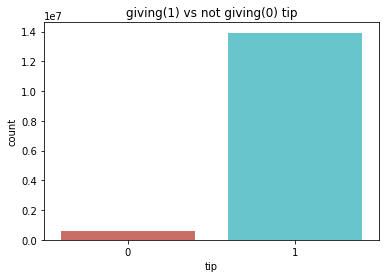

<Figure size 432x288 with 0 Axes>

In [43]:
sns.countplot(x = "tip", data = clean_merge, palette = "hls")
plt.title("giving(1) vs not giving(0) tip")
plt.show()
plt.savefig("../plots/count_plot")

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
y_train[y_train == 0]

6787422     0
12327195    0
3647925     0
10030552    0
3623882     0
           ..
570810      0
1884874     0
4527056     0
5118729     0
9276241     0
Name: tip, Length: 435605, dtype: int64

In [48]:
# logistic regression
logreg_1 = LogisticRegression()
logreg_1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [49]:
logreg_10 = LogisticRegression(C = 10)
logreg_10.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10)

In [50]:
logreg_01 = LogisticRegression(C = 0.1)
logreg_01.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1)

In [51]:
logreg_100 = LogisticRegression(C = 100)
logreg_100.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100)

In [180]:
logreg_01.score(X_train, y_train)
logreg_01.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.9968689790813793

In [53]:
# test set
logreg_1.score(X_19, y_19)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.9763281097349691

In [54]:
logreg_01.score(X_19, y_19)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.9763281097349691

In [55]:
logreg_10.score(X_19, y_19)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.9763281097349691

In [ ]:
logreg_100.score(X_19, y_19)

In [110]:
logreg_10.score(X_train, y_train)
logreg_10.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.9572031929904733

In [52]:
logreg_1.score(X_train, y_train)
logreg_1.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.9572031929904733

In [60]:
weighted_prediction = logreg_01.predict(X_19)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [61]:
# evaluation metrics
precision_score(y_19, weighted_prediction, average='weighted')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9532165778586579

In [62]:
recall_score(y_19, weighted_prediction)

1.0

In [63]:
f1_score(y_19, weighted_prediction)

0.9880222873173597

In [ ]:
fitter = ols(formula="tip ~ WEATHER + time + passenger_count + PULocationID + DOLocationID + TAVG + TMAX + TMIN",
         data = clean_merge).fit()
print(fitter.summary())

In [ ]:
clean_merge.groupby("time")["tip"].count()

In [ ]:
count = clean_merge.groupby("time")["tip"].count()
tip_count = list(count)

In [ ]:
hour = list(count.index)

In [ ]:
plt.figure(figsize = (10, 8), linewidth = 3)
plt.plot(hour, tip_count, "-o")
plt.xticks(fontsize = 12)
plt.ylabel("count", fontsize = 15, labelpad = 15)
plt.xlabel("hour", fontsize = 15, labelpad = 10)
plt.title("the number of tip received in each hour", fontsize = 15)
plt.show()
plt.savefig("../plots/count of tip in each hour")